In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('Math-Students.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
395,MS,M,18,U,GT3,T,4,4,teacher,services,...,5,3,2,1,2,4,0,8,7,7
396,MS,M,17,U,GT3,T,4,4,teacher,services,...,5,3,2,1,2,4,0,8,7,7
397,MS,M,19,U,GT3,T,4,4,teacher,other,...,5,3,2,1,2,4,0,8,7,7


In [36]:
columns = ['school', 'sex', 'age', 'G1', 'G2', 'G3']

In [37]:
df2 = df[columns]
df2.isna().sum()

,0
school,0
sex,0
age,0
G1,0
G2,0
G3,0


In [38]:
df2.isnull().sum()

,0
school,0
sex,0
age,0
G1,0
G2,0
G3,0


In [39]:
df2.drop_duplicates(inplace=True)

<ipython-input-39-9d235a8ba753>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


In [40]:
df2.duplicated().sum()

np.int64(0)

In [41]:
df2.school.value_counts()

,count
school,
GP,316
MS,48


In [42]:
df2.sex.value_counts()

,count
sex,
F,187
M,177


In [43]:
df2.describe()

,age,G1,G2,G3
count,364.000000,364.000000,364.000000,364.000000
mean,16.733516,10.766484,10.549451,10.230769
std,1.293288,3.304205,3.737278,4.571626
min,15.000000,3.000000,0.000000,0.000000
25%,16.000000,8.000000,8.000000,8.000000
50%,17.000000,10.000000,10.000000,11.000000
75%,18.000000,13.000000,13.000000,13.000000
max,22.000000,19.000000,19.000000,20.000000


In [44]:
df2

,school,sex,age,G1,G2,G3
0,GP,F,18,5,6,6
1,GP,F,17,5,5,6
2,GP,F,15,7,8,10
3,GP,F,15,15,14,15
4,GP,F,16,6,10,10
...,...,...,...,...,...,...
393,MS,M,18,11,12,10
394,MS,M,19,8,9,9
395,MS,M,18,8,7,7
396,MS,M,17,8,7,7


<ipython-input-60-62dfe767b1c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="G3", data=df2[['sex','G3']], palette="Set2")


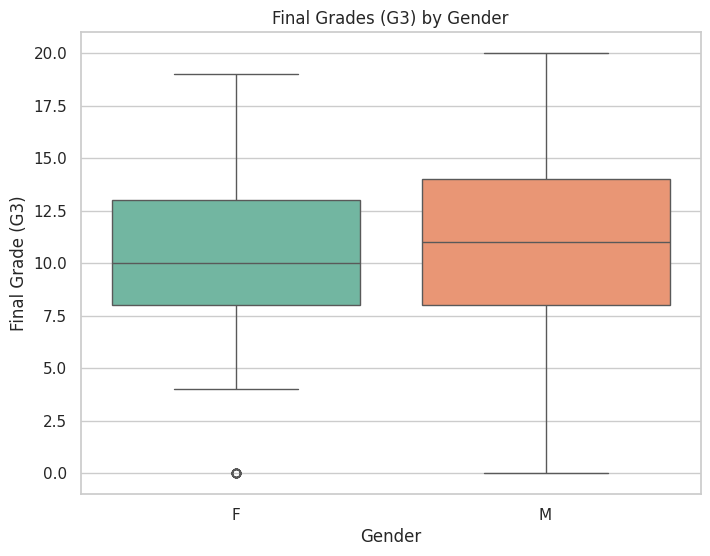

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="sex", y="G3", data=df2[['sex','G3']], palette="Set2")
plt.title("Final Grades (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Final Grade (G3)")
plt.show()


<ipython-input-61-623a7bbdf37e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="school", y="G3", data=df2[['school','G3']], palette="Set3")


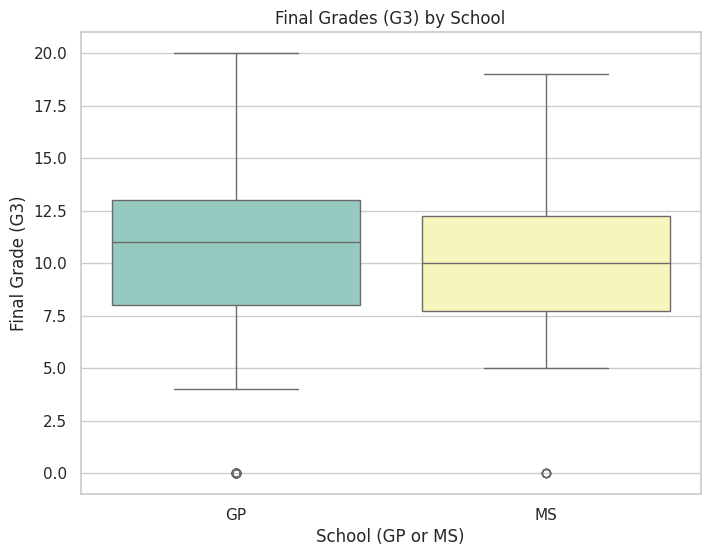

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="school", y="G3", data=df2[['school','G3']], palette="Set3")
plt.title("Final Grades (G3) by School")
plt.xlabel("School (GP or MS)")
plt.ylabel("Final Grade (G3)")
plt.show()

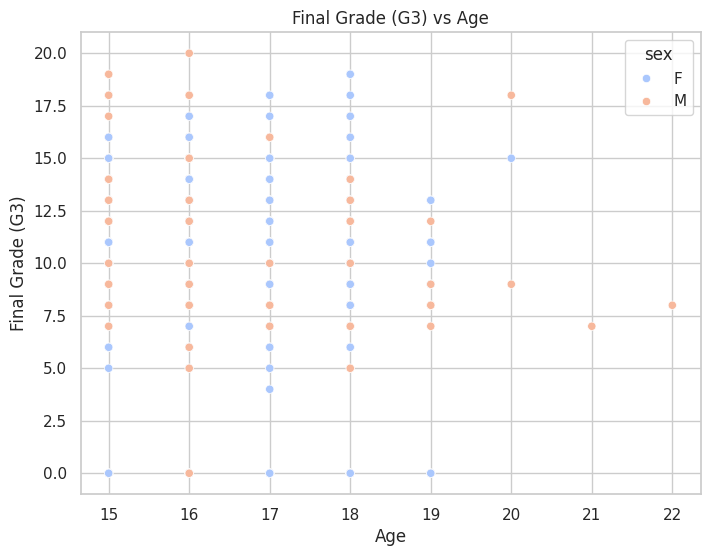

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="G3", hue="sex", data=df2[['age','G3','sex']], palette="coolwarm")
plt.title("Final Grade (G3) vs Age")
plt.xlabel("Age")
plt.ylabel("Final Grade (G3)")
plt.show()


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
# Load dataset
#df = pd.read_csv("student_data.csv")

# Encode categorical variables
le = LabelEncoder()
df2['school'] = le.fit_transform(df2['school'])  # GP=0, MS=1
df2['sex'] = le.fit_transform(df2['sex'])        # F=0, M=1

# Features and target
X = df2[['school', 'sex', 'age', 'G1', 'G2']]  # Features
y = df2['G3']                                  # Target


<ipython-input-67-3a2565d8809b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['school'] = le.fit_transform(df2['school'])  # GP=0, MS=1
<ipython-input-67-3a2565d8809b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sex'] = le.fit_transform(df2['sex'])        # F=0, M=1


In [68]:
df2

,school,sex,age,G1,G2,G3
0,0,0,18,5,6,6
1,0,0,17,5,5,6
2,0,0,15,7,8,10
3,0,0,15,15,14,15
4,0,0,16,6,10,10
...,...,...,...,...,...,...
393,1,1,18,11,12,10
394,1,1,19,8,9,9
395,1,1,18,8,7,7
396,1,1,17,8,7,7


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8297906261233974
MSE: 2.814251816901379
RMSE: 1.6775731927106428


In [ ]:
# Prepare the new data as a DataFrame (same structure as training data)
new_data = pd.DataFrame({
    'school': ['GP'],  # Categorical value for school
    'sex': ['M'],      # Categorical value for sex
    'age': [15],       # Age value
    'G1': [7],         # G1 grade
    'G2': [8]          # G2 grade
})

new_data

# Encode categorical variables
le = LabelEncoder()
new_data['school'] = le.fit_transform(new_data['school'])  # GP=0, MS=1
new_data['sex'] = le.fit_transform(new_data['sex'])        # F=0, M=1

# Make predictions
pred = model.predict(new_data)

# Output the predicted G3 value
print(f"Predicted G3: {pred[0]}")

## 🚀 You can try other models too:
 - RandomForestRegressor
 - GradientBoostingRegressor
 - XGBoost
 - or even a Neural Network using TensorFlow or PyTorch.


 - Range: 0 to 1 (though it can be negative if the model performs worse than a horizontal line)
 
 - Interpretation: "83% of the variation in final grades (G3) can be explained by your model using features like G1, G2, age, sex, and school."


✅ Good Score — 0.83 means your model is capturing the trend quite well. It's predicting G3 with strong accuracy.

📌 MSE (Mean Squared Error): 2.81

- This tells you how far off your predictions are on average — but squared.

- It penalizes larger errors more than smaller ones.

- Since grades (G3) are on a scale from 0 to 20, an MSE of 2.81 means your predictions are off by about:

```
import numpy as np
print(np.sqrt(2.81))  # ≈ 1.68
```

- So on average, you're predicting within ±1.68 points of the actual final grade — pretty accurate!

## 🧠 Summary

| Metric    | Value | What It Means                                                                 |
|-----------|-------|-------------------------------------------------------------------------------|
| R² Score  | 0.83  | 83% of variance in grades is explained by the model. Strong predictive power. |
| MSE       | 2.81  | Predictions are ~1.68 points off on average (after sqrt). Acceptable error.   |


MSE (Mean Squared Error) depends on the range and scale of your target variable. Since your target G3 (final grade) ranges from 0 to 20, here’s how you can define qualitative thresholds for MSE:

## 📏 General Rule of Thumb (for G3 Scale: 0–20)

| MSE Range | RMSE (√MSE) | Quality        | Interpretation                                              |
|-----------|-------------|----------------|-------------------------------------------------------------|
| 0 – 1     | 0 – 1       | 🌟 Excellent   | Predictions almost perfectly match actual grades             |
| 1 – 3     | 1 – 1.73    | ✅ Good        | Predictions are close, small errors                          |
| 3 – 6     | 1.73 – 2.45 | ⚖️ Average     | Still useful, but with moderate prediction errors            |
| > 6       | > 2.45      | ⚠️ Poor / Out of Range | High error; predictions not very accurate                    |




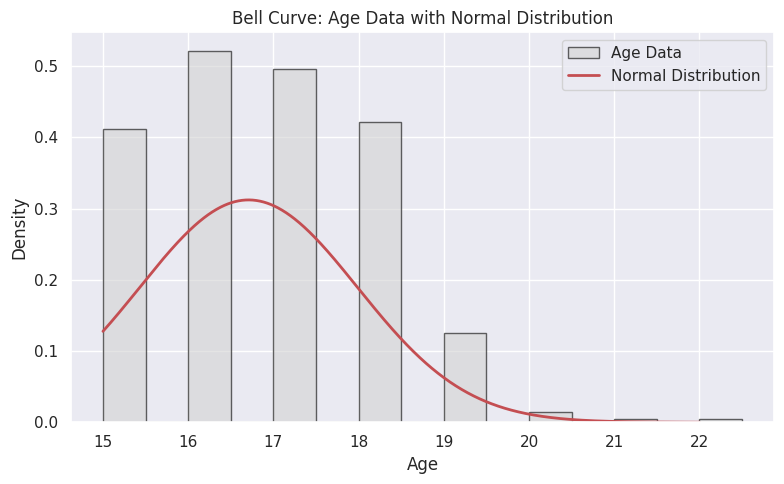

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Age data (use your real df['age'])
age_data = df['age'].dropna()

# Calculate stats
mean = age_data.mean()
std_dev = age_data.std()

# Histogram + Bell Curve
plt.figure(figsize=(8, 5))
# Use more bins to smooth out histogram (or try 'auto')
count, bins, _ = plt.hist(age_data, bins=np.arange(age_data.min(), age_data.max() + 1, 0.5),
                          density=True, color='lightgray', edgecolor='black', alpha=0.6, label='Age Data')

# Normal Distribution Curve
x = np.linspace(age_data.min(), age_data.max(), 1000)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', linewidth=2, label='Normal Distribution')

# Beautify
plt.title('Bell Curve: Age Data with Normal Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


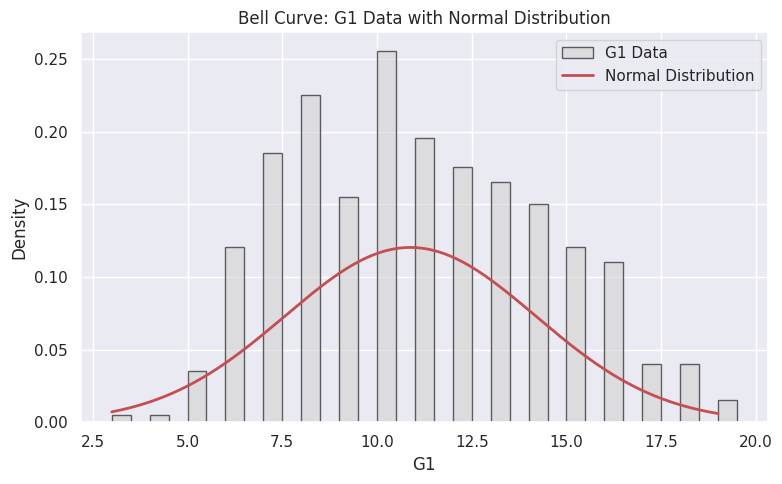

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Age data (use your real df['age'])
G1_data = df['G1'].dropna()

# Calculate stats
mean = G1_data.mean()
std_dev = G1_data.std()

# Histogram + Bell Curve
plt.figure(figsize=(8, 5))
# Use more bins to smooth out histogram (or try 'auto')
count, bins, _ = plt.hist(G1_data, bins=np.arange(G1_data.min(), G1_data.max() + 1, 0.5),
                          density=True, color='lightgray', edgecolor='black', alpha=0.6, label='G1 Data')

# Normal Distribution Curve
x = np.linspace(G1_data.min(), G1_data.max(), 1000)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', linewidth=2, label='Normal Distribution')

# Beautify
plt.title('Bell Curve: G1 Data with Normal Distribution')
plt.xlabel('G1')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


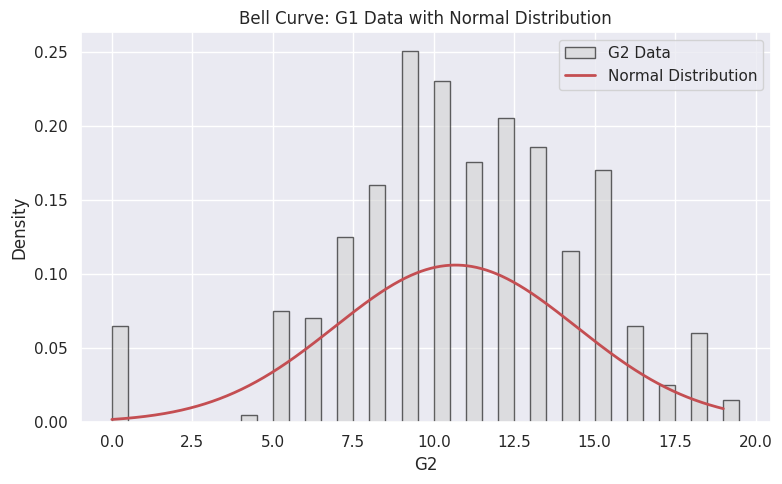

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Age data (use your real df['age'])
G2_data = df['G2'].dropna()

# Calculate stats
mean = G2_data.mean()
std_dev = G2_data.std()

# Histogram + Bell Curve
plt.figure(figsize=(8, 5))
# Use more bins to smooth out histogram (or try 'auto')
count, bins, _ = plt.hist(G2_data, bins=np.arange(G2_data.min(), G2_data.max() + 1, 0.5),
                          density=True, color='lightgray', edgecolor='black', alpha=0.6, label='G2 Data')

# Normal Distribution Curve
x = np.linspace(G2_data.min(), G2_data.max(), 1000)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', linewidth=2, label='Normal Distribution')

# Beautify
plt.title('Bell Curve: G1 Data with Normal Distribution')
plt.xlabel('G2')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


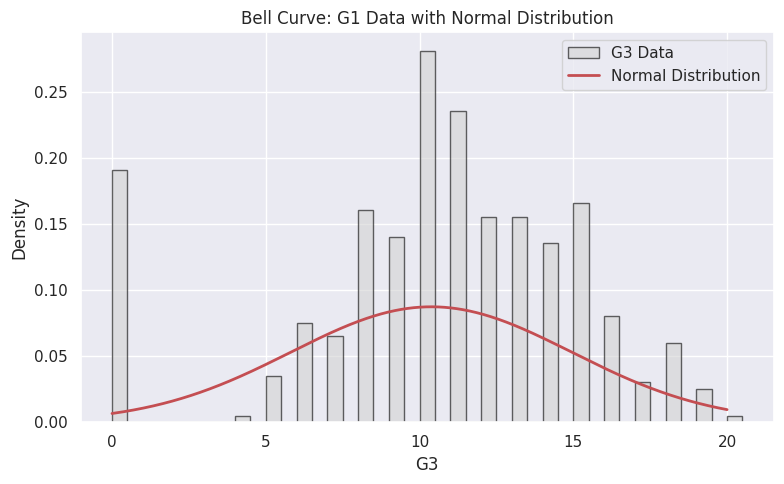

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Age data (use your real df['age'])
G3_data = df['G3'].dropna()

# Calculate stats
mean = G3_data.mean()
std_dev = G3_data.std()

# Histogram + Bell Curve
plt.figure(figsize=(8, 5))
# Use more bins to smooth out histogram (or try 'auto')
count, bins, _ = plt.hist(G3_data, bins=np.arange(G3_data.min(), G3_data.max() + 1, 0.5),
                          density=True, color='lightgray', edgecolor='black', alpha=0.6, label='G3 Data')

# Normal Distribution Curve
x = np.linspace(G3_data.min(), G3_data.max(), 1000)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', linewidth=2, label='Normal Distribution')

# Beautify
plt.title('Bell Curve: G1 Data with Normal Distribution')
plt.xlabel('G3')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

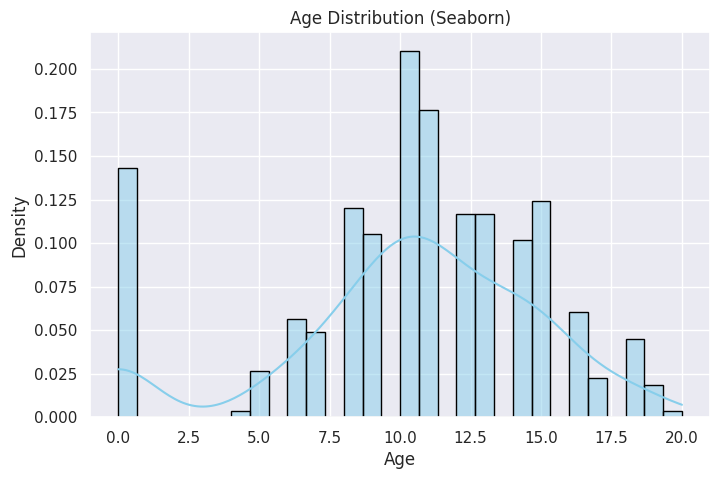

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn histogram with KDE
plt.figure(figsize=(8, 5))

sns.histplot(df['G3'], kde=True, stat='density', bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


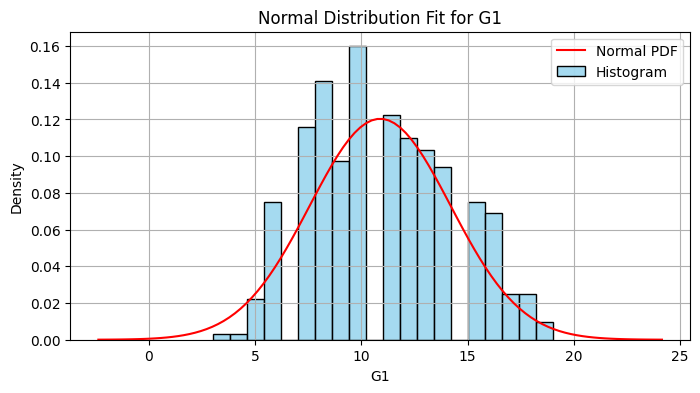

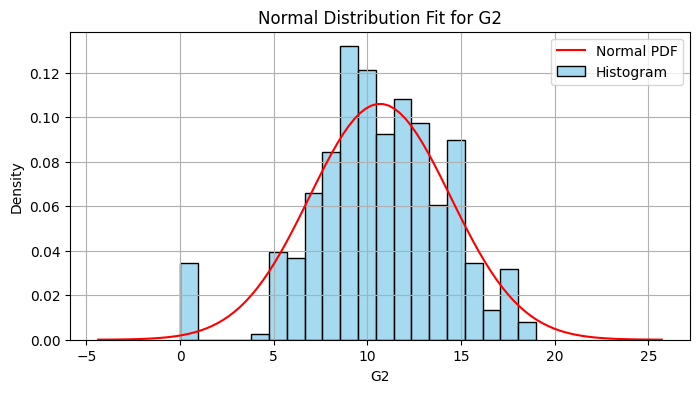

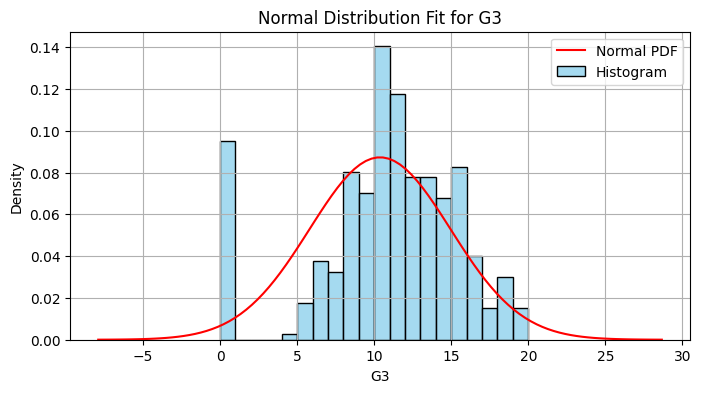

In [35]:
for col in columns:
    mu = df[col].mean()
    sigma = df[col].std()

    # Create a range of x values
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=False, stat='density', bins=20, color='skyblue', label='Histogram')
    plt.plot(x, y, color='red', label='Normal PDF')
    plt.title(f'Normal Distribution Fit for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()